In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
from dsets import *

from viz import findPositiveSamples, showCandidate

In [3]:
# lumps that potentially look like nodules
data_candit = pd.read_csv(data_path / 'candidates.csv')
print(len(data_candit))
print(data_candit.seriesuid.nunique())

seriesuid_1 = data_candit.query('`class` == 1').seriesuid
seriesuid_c = data_candit.seriesuid
print(len(seriesuid_1), len(seriesuid_1.unique()))

data_candit.head()

551065
888
1351 590


,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


In [4]:
# lumps that have been flagged as nodules
data_annot = pd.read_csv(data_path / 'annotations.csv')
print(len(data_annot))
print(data_annot.seriesuid.nunique())
seriesuid_a = data_annot.seriesuid

data_annot.head()

1186
601


,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [65]:
len(set(seriesuid_1) - set(seriesuid_a))

0

In [66]:
len(set(seriesuid_a) - set(seriesuid_1))

11

In [68]:
len(set(seriesuid_a) - set(seriesuid_c))

0

In [17]:
mhd_path = next(data_path.glob(f'subset*/{series_uid}.mhd')) 
ct_mhd = sitk.ReadImage(mhd_path.as_posix())

In [19]:
ct_mhd.GetDirection()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [5]:
%%time
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)

CPU times: user 3.34 s, sys: 177 ms, total: 3.52 s
Wall time: 3.52 s


In [11]:
positiveInfo_list = [x for x in candidateInfo_list if x.isNodule_bool]

In [13]:
diameter_list = [x.diameter_mm for x in positiveInfo_list]

In [18]:
diameter_list[::100]

[32.27003025,
 21.57854728,
 17.30912384,
 13.0575593,
 10.36232088,
 8.623614727,
 7.35278351,
 6.489388614,
 5.981259208,
 5.512269698,
 5.050147896,
 4.617203255,
 3.973281304,
 0.0]

In [5]:
nodulelist = findPositiveSamples()

In [3]:
uid = nodulelist[0].series_uid

1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886 0 False [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


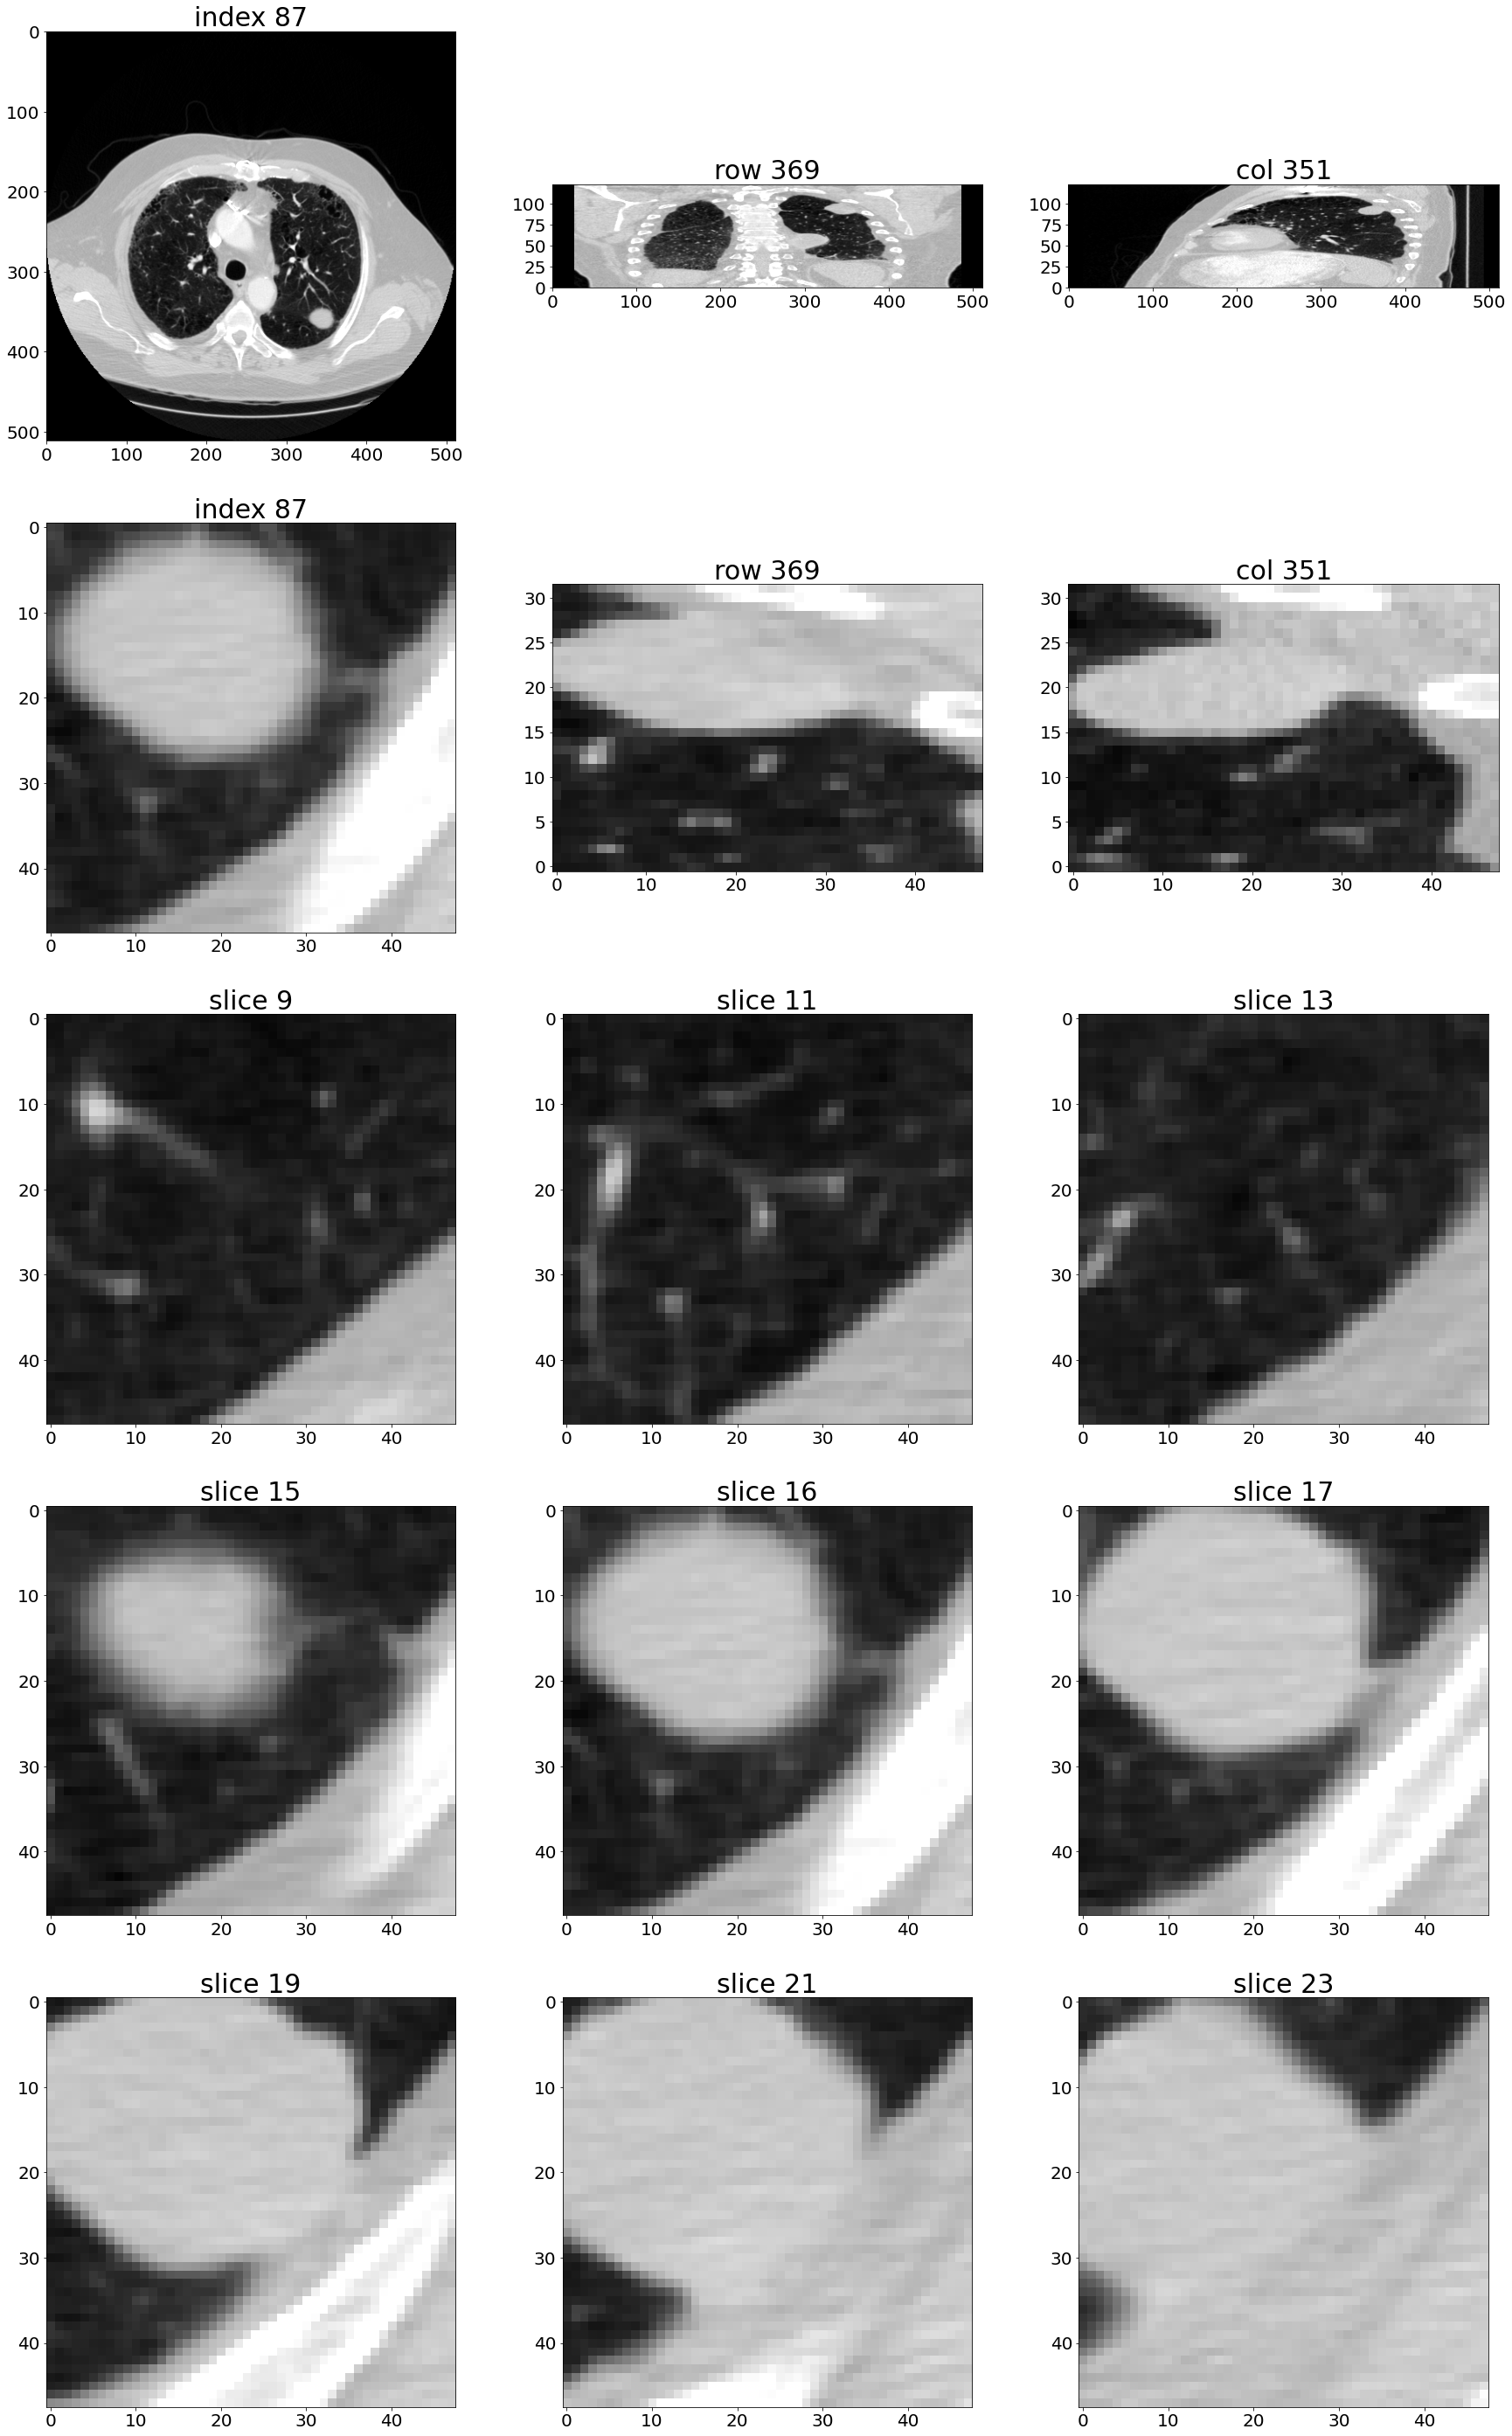

In [6]:
showCandidate(uid)

In [10]:
test_dataset = LunaDataset()

In [7]:
obj = test_dataset[0]

In [8]:
type(obj)
obj[0].shape

torch.Size([1, 32, 48, 48])

In [14]:
obj[3]

tensor([ 87., 369., 351.], dtype=torch.float64)

In [27]:
[x for x in test_dataset.candidateInfo_list if not x.isNodule_bool][-10:]

[CandidateInfoTuple(isNodule_bool=False, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', center_xyz=(-124.04, -154.02, -297.87)),
 CandidateInfoTuple(isNodule_bool=False, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', center_xyz=(-124.74, -127.4, -324.57)),
 CandidateInfoTuple(isNodule_bool=False, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', center_xyz=(-125.469883651, -103.452946075, -326.495844854)),
 CandidateInfoTuple(isNodule_bool=False, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', center_xyz=(-126.84, -115.49, -362.51)),
 CandidateInfoTuple(isNodule_bool=False, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', center_xyz=(-126.853353168, -176.89358844, -315.108823752)),
 CandidateInfoTuple(isNodule_bool=False, diameter_mm=0.0, series_uid='

In [5]:
%%time

N=100

for k in range(N):
    sample = test_dataset[k]

Crop outside of CT array: 1.3.6.1.4.1.14519.5.2.1.6279.6001.487745546557477250336016826588 (46.57, -14.01, -71.3), center:IrcTuple(index=122.0, row=237.0, col=315.0) shape:(137, 512, 512) width:(32, 48, 48)


CPU times: user 6.49 s, sys: 8.46 s, total: 15 s
Wall time: 7.55 s


In [6]:
%%time

N=100

for k in range(N):
    sample = test_dataset[k]

CPU times: user 37.3 ms, sys: 1.13 ms, total: 38.5 ms
Wall time: 38.1 ms
